In [1]:
import os 
import pickle
import gzip
import time
import shutil
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)

In [4]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data')
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

In [5]:
from urllib.request import urlretrieve

In [6]:
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [7]:
!ls -l data

total 16656
-rw-r--r-- 1 ryvik ryvik 17051982 Jan 16 23:07 mnist.pkl.gz


In [8]:
with gzip.open(path_gz, 'rb') as f:
    mnist_data = pickle.load(f, encoding='latin-1')

In [9]:
# mnist_data is a tuple of tuples of nparrays, there are a training set a validation set an a test set.
type(mnist_data), len(mnist_data)

(tuple, 3)

In [10]:
((x_train, y_train), (x_valid, y_valid), _) = mnist_data

In [11]:
x_train.shape, x_valid.shape

((50000, 784), (10000, 784))

In [12]:
x_train[0][200:210], y_train[0]

(array([0.        , 0.        , 0.        , 0.19140625, 0.9296875 ,
        0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125],
       dtype=float32),
 5)

In [13]:
# The data is of type numpy.array
# As we cannot use np.arrays but just the std python library for now, we'll change the format to a list and work a way to transform this list into a list of lists
# 

## Change the shape of the data


> .For now we cannot use numpy so we'll use lists <br  />
> .The list won't have the right shape so a list of lists should be built

In [14]:
ex1 = list(x_train[0])
len(ex1)

784

##### Tests with the yield concept

> Question: is `yield` a concept similar to what happens in async programming since it allows the program to keep running while this part yields?

Yes in a way, because a yield instruction will just allow to interrupt the thread or one of the threads ofa process in a predetermined manner. Here `yield` does not break the sync nature of the program because the rest of the instruction will occur in the predefined sequential way in the thread line by line. However in async programming only one thread is running and a loop takes care of the distribution of the different tasks that run concurrently and each task has instrutions to work or wait while other aspects of the code are dynamically being executed. <br  />

*see: https://stackoverflow.com/questions/59557125/why-is-it-that-only-asynchronous-functions-can-yield-in-asynchronous-code*  

In [15]:
import random 

In [16]:
test = []
for i in range(100):
    test.append(random.randint(0,100))

In [17]:
test[:10]

[100, 11, 65, 10, 37, 46, 28, 91, 27, 4]

In [18]:
sx = 2  # make it a global variable and change it while the loop is running

In [19]:
def chunkk(x):
    global sx
    for i, j in enumerate(range(0, len(x), sx)):
        yield (i, j)
        print(sx)
        yield x[i*sx:(i+1)*sx]

In [20]:
chunkk(test)

<generator object chunkk at 0x7fa0f04e7450>

In [21]:
val_iter = iter(chunkk(test))
print(next(val_iter))
print(next(val_iter))

(0, 0)
2
[100, 11]


In [22]:
sx = 3

In [23]:
print(next(val_iter))
print(next(val_iter))

(1, 2)
3
[10, 37, 46]


The for for loop has started with the previous value of sx so the i and j values depend on the first value of sx=2 <br/>
However as we `yield`, it is possible for the program to execute the following instructions with the updated value of sx=3.

#### Build the list of lists

In [24]:
ex1 = list(x_train[0])
len(ex1)

784

In [25]:
# Build list of lists of size sz
def chunks(x, sz):
    for i in range(0, len(x), sz): 
        yield x[i:i+sz]

In [26]:
val_iter = iter(chunks(ex1, 5))

In [27]:
next(val_iter)

[0.0, 0.0, 0.0, 0.0, 0.0]

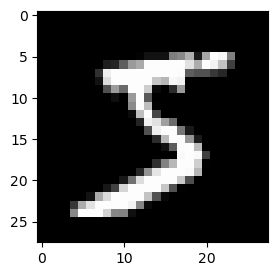

In [28]:
mpl.rcParams['figure.figsize'] = (3,3)
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(ex1, 28)))

> Check the python `itertools` library, it helps to use iterators in a efficient way

> we can replace the chunk function with the `islice` method for instance: `islice` will create an iterator and we can use another iterator to pop the desired number of values at each call

In [29]:
from itertools import islice

In [30]:
it = iter(ex1)
it_s = iter(ex1[200:210])

In [31]:
list(islice(it_s, 5)), list(islice(it_s, 5))

([0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125])

>.Now we can create another iterator with a function to get all the islice iterator values -- see the docstring of iter() with shift+tab <br>
.(We could also build an adequate class with the functions $__iter__$ and $__next__$ functions)

In [32]:
img = list(iter(lambda: list(islice(it, 28)), []))

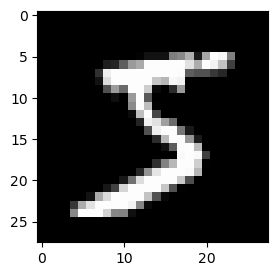

In [33]:
plt.imshow(img);

> Let's check the performance:

    1. islice method
    2. chunks function method

In [34]:
%%timeit
it = iter(ex1)
img = list(iter(lambda: list(islice(it, 28)), []))

13 µs ± 406 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [35]:
%%timeit
it = iter(ex1)
val_iter = iter(chunks(ex1, 28))

256 ns ± 6.67 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


#### Now let's build a representation of the list that allows us to use the [x,y] format instead of [x][y] 

In [36]:
img[20][10]

0.09375

In [37]:
class Matrix():
    def __init__(self, xs): 
        self.xs = xs
        self.shape = (len(xs),len(xs[0]))
    def __getitem__(self, idx): return self.xs[idx[0]][idx[1]]
    def __repr__(self): 
        for l in self.xs: print(str(l))
    

In [38]:
m_img = Matrix(img)
m_img.shape

(28, 28)

In [39]:
m_img[5,15]

0.0703125

> Now that we can represent data in that form, we can use the pytorch tensor representation

In [40]:
import torch
from torch import tensor

In [41]:
t_img = tensor(img)
t_img[5, 15]

tensor(0.0703)

> Let's transform all the data into torch tensors

In [42]:
x_train, x_valid, y_train, y_valid = map(tensor, (x_train, x_valid, y_train, y_valid))

In [43]:
x_train.shape

torch.Size([50000, 784])

In [44]:
imgs = x_train.reshape(-1, 28,28)

In [45]:
imgs.shape

torch.Size([50000, 28, 28])

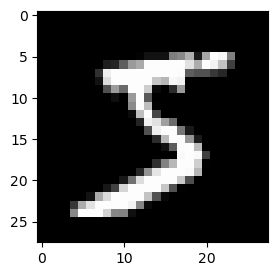

In [46]:
plt.imshow(imgs[0])

In [47]:
x_train.shape

torch.Size([50000, 784])

#### Exploration of random number generators

> We'll use the `os.fork()` method to create two separate processes to see how the random number generators behave in two forked processes. A quick check to understand how os.fork works can be found [here](https://stackoverflow.com/questions/33560802/pythonhow-os-fork-works).<br>
> The explanations of the most voted and the validated answers clearly explain what's happening when `os.fork()` is called.<br>
The code of the validated answer is copied in the following cell $\downarrow$

In [48]:
# for i in range(2):
#     print('**********%d***********' % i)
#     print(time.time())
#     pid = os.fork()
#     if pid == 0:
#         # We are in the child process.
#         print("%d (child) just was created by %d." % (os.getpid(), os.getppid()))
#         print()
#     else:
#         # We are in the parent process.
#         print("%d (parent) just created %d." % (os.getpid(), pid))
#         print()

> From the moment `os.fork()` is called, two identical processes run simultanmeously 

In [49]:
uu = 5
if os.fork(): 
    uu = 7
    print(f'In elder - the value of uu is {uu}')
else:
    print(f'In disciple - the value of uu is {uu}')
    os._exit(os.EX_OK)

In elder - the value of uu is 7
In disciple - the value of uu is 5


> Using `os.fork()` will allow us to verify if the pseudo random number seed (and thus sequence) is reinitialized when a fork is created. <br>
We first build a random number generator:

In [50]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [51]:
seed(79845)
rnd_state

(19310, 3, 1)

In [52]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x,y,z
    return (x/30269 + y/30307 + z/30323) % 1.0

In [53]:
rand(),rand(),rand()

(0.11146883875451012, 0.07259089120069717, 0.3884028450770509)

>We can see in the following cell that the random number is the same in both processes for :
>   - our generator 
>   - pytorch 
>   - numpy <br>

>but not for the python standard library `random` module!

In [54]:
if os.fork(): print(f'In parent: {rand()}')
else:
    print(f'In child: {rand()}')
    os._exit(os.EX_OK)

In parent: 0.08502771771920781
In child: 0.08502771771920781


In [55]:
if os.fork(): print(f'In parent: {torch.rand(1)}')
else:
    print(f'In child: {torch.rand(1)}')
    os._exit(os.EX_OK)

In parent: tensor([0.4803])
In child: tensor([0.4803])


In [56]:
import numpy as np
if os.fork(): print(f'In parent: {np.random.rand(1)}')
else:
    print(f'In child: {np.random.rand(1)}')
    os._exit(os.EX_OK)

In parent: [0.17033669]
In child: [0.17033669]


In [57]:
from random import random
if os.fork(): print(f'In parent: {random()}')
else:
    print(f'In child: {random()}')
    os._exit(os.EX_OK)

In parent: 0.9338059025149558
In child: 0.8093598507929066


In [79]:
%timeit -n 10 list(chunks([rand() for _ in range(784)], 10))

390 µs ± 47.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [80]:
%timeit -n 10 torch.randn(784, 10)

The slowest run took 5.33 times longer than the fastest. This could mean that an intermediate result is being cached.
67.7 µs ± 60.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Reproduce Matrix multiplication
.We'll take the 5 first examples of the set and the flattened representation of the 28x28 pixels to 784<br>
.The 5 first examples will be represented as a 5x784 tensor<br>
.We can use the datasets as torch tensors since we converted them earlier with `x_train, x_valid, y_train, y_valid = map(tensor, (x_train, x_valid, y_train, y_valid))`

In [60]:
torch.manual_seed(1)
weights = torch.randn(784, 10)
bias = torch.zeros(10)

In [255]:
m1 = x_train[:5]
m2 = weights
si, sk = m1.shape
sk, sj = m2.shape
m1.shape, m2.shape, si, sk, sj

(torch.Size([5, 784]), torch.Size([784, 10]), 5, 784, 10)

In [90]:
m3 = torch.zeros(5, 10)
m3.shape

torch.Size([5, 10])

In [63]:
for i in range(si):
    for j in range(sj):
        for k in range(sk): 
            m3[i, j] += m1[i,k]*m2[k,j]

In [64]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)

In [65]:
m1@m2, m3

(tensor([[  0.96,  -2.96,  -2.11,   0.27,   1.28,  -5.20, -10.31, -15.09, -17.69,   0.60],
         [  6.89,  -0.34,   0.79, -14.74,   6.90,  -3.08, -15.04, -17.13, -25.36,  16.23],
         [-10.18,   7.38,   4.13,   3.27,  13.88,  -5.15,  -7.14,  -6.73,  -6.79,  -1.58],
         [  0.97,   2.39, -15.22,   7.73,  -8.19, -12.33,  -5.98,  -1.17,   7.05,  -1.42],
         [  6.85,  14.07, -11.92,   2.34,   4.62,  -3.37,  -5.47,  -0.65, -30.56,   7.88]]),
 tensor([[  0.96,  -2.96,  -2.11,   0.27,   1.28,  -5.20, -10.31, -15.09, -17.69,   0.60],
         [  6.89,  -0.34,   0.79, -14.74,   6.90,  -3.08, -15.04, -17.13, -25.36,  16.23],
         [-10.18,   7.38,   4.13,   3.27,  13.88,  -5.15,  -7.14,  -6.73,  -6.79,  -1.58],
         [  0.97,   2.39, -15.22,   7.73,  -8.19, -12.33,  -5.98,  -1.17,   7.05,  -1.42],
         [  6.85,  14.07, -11.92,   2.34,   4.62,  -3.37,  -5.47,  -0.65, -30.56,   7.88]]))

In [161]:
def matmul(m1, m2):
    si, sk = m1.shape
    sk, sj = m2.shape
    m3 = torch.zeros(si, sj)
    for i in range(si):
        for j in range(sj):
            for k in range(sk): 
                m3[i, j] += m1[i,k]*m2[k,j]
    return m3

In [164]:
%time _=matmul(m1, m2)

CPU times: user 611 ms, sys: 163 µs, total: 611 ms
Wall time: 610 ms


> We can accelerate this by precompiling this funciton in C via `numba`<br>
To use numba here we need to build a function that does not depend on `torch` arrays, but it works with `numpy`

In [174]:
from numba import njit
import numpy as np

> try `njit` on the whole function: <br>
*fastest result*

In [212]:
m3 = torch.zeros(5,10)
@njit
def matmul(m1, m2, m3):
    si, sk = m1.shape
    sk, sj = m2.shape
#     m3 = np.zeros(si, sj)
    for i in range(si):
        for j in range(sj):
            for k in range(sk): 
                m3[i, j] += m1[i,k]*m2[k,j]
    return m3

In [213]:
%time _=matmul(m1.numpy(), m2.numpy(), m3.numpy())

CPU times: user 133 ms, sys: 48 µs, total: 133 ms
Wall time: 132 ms


In [214]:
%time _=matmul(m1.numpy(), m2.numpy(), m3.numpy())

CPU times: user 212 µs, sys: 0 ns, total: 212 µs
Wall time: 252 µs


> try `njit` on the inner loop (dot product function):<br>
*note that the first time we use the function, the execution time is longer because numba has to compile the code in C*


In [215]:
@njit 
def dot(u,v):
    res = 0.
    for i in range(len(u)): res+=u[i]*v[i]
    return res

In [216]:
%time dot(np.array([1,2,3]), np.array([5,6,7]))

CPU times: user 70.6 ms, sys: 10 µs, total: 70.6 ms
Wall time: 69.4 ms


38.0

In [217]:
%time dot(np.array([1,2,3]), np.array([5,6,7]))

CPU times: user 22 µs, sys: 0 ns, total: 22 µs
Wall time: 24.8 µs


38.0

###### compare with later implementation
*$\downarrow$(compare the last result of the section below with later implementations)*

> And the performance in `matmul`: <br>
*compared to the previous njited matmul, the first execution is faster but the consecutive executions are slower*

In [256]:
def matmul(m1, m2):
    si, sk = m1.shape
    sk, sj = m2.shape
    m3 = torch.zeros(si, sj)
    for i in range(si):
        for j in range(sj):
            m3[i,j] = dot(m1[i,:],m2[:,j])
    return m3

In [219]:
%time _=matmul(m1.numpy(), m2.numpy())

CPU times: user 77.3 ms, sys: 141 µs, total: 77.5 ms
Wall time: 76.8 ms


In [220]:
%time _=matmul(m1.numpy(), m2.numpy())

CPU times: user 3.45 ms, sys: 3 µs, total: 3.45 ms
Wall time: 2.91 ms


In [261]:
%timeit -n 50 matmul(m1.numpy(), m2.numpy())

438 µs ± 95.7 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


> try on the whole matmul function again but with the 'njited' dot function as well: <br>
  *worst result*

In [221]:
m3 = torch.zeros(5,10)
@njit
def matmul(m1, m2, m3):
    si, sk = m1.shape
    sk, sj = m2.shape
#     m3 = np.zeros(si, sj)
    for i in range(si):
        for j in range(sj):
            for k in range(sk): 
                m3[i, j] += dot(m1[i,:],m2[:,j])
    return m3

In [222]:
%time _=matmul(m1.numpy(), m2.numpy(), m3.numpy())

CPU times: user 176 ms, sys: 111 µs, total: 176 ms
Wall time: 175 ms


In [223]:
%time _=matmul(m1.numpy(), m2.numpy(), m3.numpy())

CPU times: user 39.9 ms, sys: 0 ns, total: 39.9 ms
Wall time: 39.5 ms


#### Elementwise operations

In [227]:
u = tensor([5,3,1])
v = tensor([2,5,9])
u, v

(tensor([5, 3, 1]), tensor([2, 5, 9]))

In [262]:
u + v

tensor([ 7,  8, 10])

In [231]:
(u<v).float().mean()

tensor(0.67)

In [233]:
m = tensor([[4,4,9],[5,4,6],[7,9,1]])
m

tensor([[4, 4, 9],
        [5, 4, 6],
        [7, 9, 1]])

In [238]:
(m**2).sum().sqrt()

tensor(17.92)

> we can now use the sum operation to simplify one loop:

In [249]:
def matmul(m1, m2):
    (si, sk), (sk, sj) = m1.shape, m2.shape
    m3 = torch.zeros(si, sj)
    for i in range(si):
        for j in range(sj): m3[i, j] = (m1[i,:]*m2[:,j]).sum()
    return m3

In [253]:
%timeit -n 50 matmul(m1, m2)

927 µs ± 56.7 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


$\uparrow$ the result above is good but not as good as the matmul function with the `njit` dot() function [see here](#compare-with-later-implementation)

>sum over different dimensions

In [292]:
b = torch.arange(2 * 3 * 2).view(2, 3, 2)
b, b.sum(dim=(2,1))

(tensor([[[ 0,  1],
          [ 2,  3],
          [ 4,  5]],
 
         [[ 6,  7],
          [ 8,  9],
          [10, 11]]]),
 tensor([15, 51]))

### Broadcasting
The way broadcasting works is very interesting, it does not create copies of the vector in the missing dimensions but create a `stride` that directs the behavior of the increment in memory where the values are store, so that when it needs to repeat a row x times, it just has a stride of 0 in that direction and does not move from the row it reads. <br>
Doing so allows to minimize memory usage and task execution times.

In [263]:
u = tensor([10,20,30])
m

tensor([[4, 4, 9],
        [5, 4, 6],
        [7, 9, 1]])

In [294]:
m + u

tensor([[14, 24, 39],
        [15, 24, 36],
        [17, 29, 31]])

In [265]:
m0 = tensor([[1,2], [3,4], [5,6]])

In [293]:
u.view(3,1), m0+u.view(3,1)

(tensor([[10],
         [20],
         [30]]),
 tensor([[11, 12],
         [23, 24],
         [35, 36]]))

In [269]:
u.shape, m.shape, m0.shape

(torch.Size([3]), torch.Size([3, 3]), torch.Size([3, 2]))

> When broadcasting, the 1-dim vector turns into a matrix like this:

In [295]:
u_ex = u.expand_as(m)
u_ex

tensor([[10, 20, 30],
        [10, 20, 30],
        [10, 20, 30]])

> However the two new rows added above are not written in memory:

In [303]:
u.storage(), u.shape, u_ex.storage(), u_ex.shape

( 10
  20
  30
 [torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 3],
 torch.Size([3]),
  10
  20
  30
 [torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 3],
 torch.Size([3, 3]))

> What changes is the stride, meaning the way the information stored in memory is read: 

In [304]:
u.stride(), u_ex.stride()

((1,), (0, 1))

> We can add dimensions to a tensor by using `unsqueeze()` or the key word **None**:

In [313]:
u.unsqueeze(0), u[None, :], u[None]

(tensor([[10, 20, 30]]), tensor([[10, 20, 30]]), tensor([[10, 20, 30]]))

In [309]:
u.shape, u[None, :].shape

(torch.Size([3]), torch.Size([1, 3]))

> We can transpose the vector using the same format:

In [310]:
u.unsqueeze(1), u[:, None]

(tensor([[10],
         [20],
         [30]]),
 tensor([[10],
         [20],
         [30]]))

In [312]:
u[:, None].shape

torch.Size([3, 1])

In [314]:
u[None].shape, u[...,None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

In [315]:
m + u[None,:]

tensor([[14, 24, 39],
        [15, 24, 36],
        [17, 29, 31]])

In [316]:
m + u[:,None]

tensor([[14, 14, 19],
        [25, 24, 26],
        [37, 39, 31]])

> We can explore the broadcasting rules:

In [317]:
u[None,:], u[:,None]

(tensor([[10, 20, 30]]),
 tensor([[10],
         [20],
         [30]]))

>`*` corresponds to an **outer product**:

In [318]:
u[None,:] * u[:,None]

tensor([[100, 200, 300],
        [200, 400, 600],
        [300, 600, 900]])

In [322]:
u[:,None] * u[None,:]

tensor([[100, 400, 900]])

In [330]:
u.view(1,3)*u.view(3,1)

tensor([[100, 200, 300],
        [200, 400, 600],
        [300, 600, 900]])

The broadcasting operation is realised if the outer dimension of the vectors involved is the same, like (5x3) and (1x3)

#### Accelerating matmul with broadcasting

> Previous matmul version:

In [372]:
def matmul(m1, m2):
    (si, sk), (sk, sj) = m1.shape, m2.shape
    m3 = torch.zeros(si, sj)
    for i in range(si):
        for j in range(sj): m3[i, j] = (m1[i,:]*m2[:,j]).sum()
    return m3

In [373]:
matmul(m1, m2)

tensor([[  0.96,  -2.96,  -2.11,   0.27,   1.28,  -5.20, -10.31, -15.09, -17.69,   0.60],
        [  6.89,  -0.34,   0.79, -14.74,   6.90,  -3.08, -15.04, -17.13, -25.36,  16.23],
        [-10.18,   7.38,   4.13,   3.27,  13.88,  -5.15,  -7.14,  -6.73,  -6.79,  -1.58],
        [  0.97,   2.39, -15.22,   7.73,  -8.19, -12.33,  -5.98,  -1.17,   7.05,  -1.42],
        [  6.85,  14.07, -11.92,   2.34,   4.62,  -3.37,  -5.47,  -0.65, -30.56,   7.88]])

In [374]:
%timeit -n 50 matmul(m1, m2)

941 µs ± 47.9 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


> Matmul with broadcasting and removing one more loop:<br>
 *One needs to add an axis of dimension 1 in the right position for the broadcasting to operate*

In [379]:
m2.shape, m1[0][:,None].expand_as(m2).shape

(torch.Size([784, 10]), torch.Size([784, 10]))

In [412]:
def matmul(m1, m2):
    (si, sk), (sk, sj) = m1.shape, m2.shape
    m3 = torch.zeros(si, sj)
    for i in range(si):
        m3[i] = (m1[i][:,None].expand_as(m2)*m2).sum(dim=0)
    return m3

In [381]:
matmul(m1, m2)

tensor([[  0.96,  -2.96,  -2.11,   0.27,   1.28,  -5.20, -10.31, -15.09, -17.69,   0.60],
        [  6.89,  -0.34,   0.79, -14.74,   6.90,  -3.08, -15.04, -17.13, -25.36,  16.23],
        [-10.18,   7.38,   4.13,   3.27,  13.88,  -5.15,  -7.14,  -6.73,  -6.79,  -1.58],
        [  0.97,   2.39, -15.22,   7.73,  -8.19, -12.33,  -5.98,  -1.17,   7.05,  -1.42],
        [  6.85,  14.07, -11.92,   2.34,   4.62,  -3.37,  -5.47,  -0.65, -30.56,   7.88]])

In [383]:
%timeit -n 50 matmul(m1, m2)

150 µs ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


> On the whole dataset:

In [396]:
res = matmul(x_train, weights)
res

tensor([[  0.96,  -2.96,  -2.11,  ..., -15.09, -17.69,   0.60],
        [  6.89,  -0.34,   0.79,  ..., -17.13, -25.36,  16.23],
        [-10.18,   7.38,   4.13,  ...,  -6.73,  -6.79,  -1.58],
        ...,
        [  7.40,   7.64,  -3.50,  ...,  -1.02, -16.22,   2.07],
        [  3.25,   9.52,  -9.37,  ...,   2.98, -19.58,  -1.96],
        [ 15.70,   4.12,  -5.62,  ...,   8.08, -12.21,   0.42]])

In [388]:
res.shape

torch.Size([50000, 10])

In [413]:
%time _=matmul(x_train, weights)

CPU times: user 1.7 s, sys: 111 ms, total: 1.81 s
Wall time: 1.27 s


In [415]:
%timeit -n 5 x_train@weights

11.6 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


### Einstein summation
> we can perform complex reshaping and matrix calculation operations in a very compact form using einstein summation

In [402]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [403]:
mr = torch.einsum('ik,kj->ikj', m1, m2)
mr.shape

torch.Size([5, 784, 10])

In [405]:
mr.sum(1)

tensor([[  0.96,  -2.96,  -2.11,   0.27,   1.28,  -5.20, -10.31, -15.09, -17.69,   0.60],
        [  6.89,  -0.34,   0.79, -14.74,   6.90,  -3.08, -15.04, -17.13, -25.36,  16.23],
        [-10.18,   7.38,   4.13,   3.27,  13.88,  -5.15,  -7.14,  -6.73,  -6.79,  -1.58],
        [  0.97,   2.39, -15.22,   7.73,  -8.19, -12.33,  -5.98,  -1.17,   7.05,  -1.42],
        [  6.85,  14.07, -11.92,   2.34,   4.62,  -3.37,  -5.47,  -0.65, -30.56,   7.88]])

In [406]:
mr = torch.einsum('ik,kj->ij', m1, m2)
mr.shape

torch.Size([5, 10])

In [407]:
mr

tensor([[  0.96,  -2.96,  -2.11,   0.27,   1.28,  -5.20, -10.31, -15.09, -17.69,   0.60],
        [  6.89,  -0.34,   0.79, -14.74,   6.90,  -3.08, -15.04, -17.13, -25.36,  16.23],
        [-10.18,   7.38,   4.13,   3.27,  13.88,  -5.15,  -7.14,  -6.73,  -6.79,  -1.58],
        [  0.97,   2.39, -15.22,   7.73,  -8.19, -12.33,  -5.98,  -1.17,   7.05,  -1.42],
        [  6.85,  14.07, -11.92,   2.34,   4.62,  -3.37,  -5.47,  -0.65, -30.56,   7.88]])

In [416]:
def matmul(m1, m2): return torch.einsum('ik,kj->ij', m1, m2)

In [417]:
%timeit -n 5 matmul(x_train, weights)

11.6 ms ± 1.69 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


The result is similar to the `@` pytorch operator that we can use since we reimplemented it. 

### CUDA
> We can get a faster result by using the GPU architecture: